<a href="https://colab.research.google.com/github/Dracomp89/Eduardo-Phillips---202115611/blob/main/Tarea2/Tarea_2_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejericio 8. Derivación.



La derivada progresiva de la función es [1.5910402  1.45630461 1.35318545 1.2715208  1.2052382  1.15045878
 1.10457543 1.06576433 1.03270785 1.00442889 0.9801871  0.95941157
 0.94165567 0.92656601 0.91386055 0.90331286 0.89474068 0.88799737
 0.88296554 0.87955224 0.87768528 0.87731045 0.87838944 0.88089824
 0.88482602 0.89017435 0.89695677 0.90519855 0.91493677 0.92622063
 0.939112   0.95368617 0.97003296 0.98825803 1.00848461 1.03085551
 1.05553572 1.08271538 1.11261357 1.1454827  1.18161405 1.22134434
 1.26506385 1.31322641 1.36636172 1.42509067 1.49014459 1.56238945
 1.64285679 1.73278338]
La derivada central de la función es: [1.59639318 1.45974366 1.35555364 1.27323751 1.20653315 1.1514673
 1.10538191 1.06642386 1.03325782 1.00489547 0.98058914 0.95976297
 0.94196691 0.92684515 0.91411389 0.90354543 0.89495655 0.88819991
 0.88315756 0.87973614 0.87786316 0.87748417 0.87856067 0.88106854
 0.88499686 0.89034717 0.89713296 0.90537955 0.91512404 0.92641572
 0.93931654 0.95390195 0.970

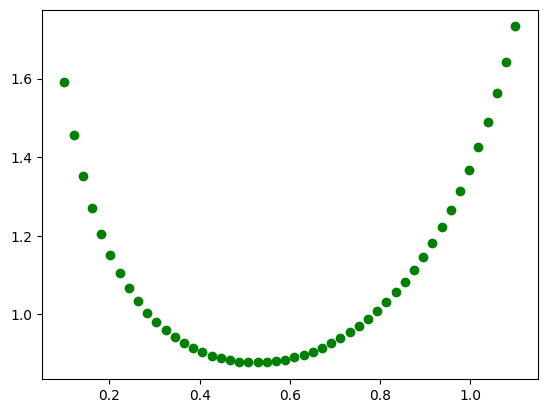

In [5]:
import numpy as np
import matplotlib.pyplot as plt

h=0.01

x = np.linspace(0.1, 1.1)

def Funcion(x):

    return np.sqrt((np.tan(x)))


def RightDerivative(f,x,h):

  d = 0.

  if h != 0:
    d = ((-3*f(x))+(4*f(x+h)) - f(x+2*h))/(2*h)

  return d


def sec(x):

    return 1/np.cos(x)

def CentralDerivative(f,x,h):

  d = 0.

  if h != 0:
    d = (f(x+h) - f(x-h))/(2*h)

  return d

def derivada_analitica(x):

    return (sec(x)**2)/(2*np.sqrt(np.tan(x)))

error_progresivo=np.abs(RightDerivative(Funcion, x, h)-derivada_analitica(x))

error_central=np.abs(CentralDerivative(Funcion, x, h)-derivada_analitica(x))

print("La derivada progresiva de la función es",RightDerivative(Funcion, x, h))

#plt.scatter(x, RightDerivative(Funcion, x, h), color="g")

#plt.scatter(x, CentralDerivative(Funcion, x, h), color="b")

#plt.scatter(x, derivada_analitica(x), color="r")

print("La derivada central de la función es:",CentralDerivative(Funcion, x, h))

print("La derivada analítica de la función es:", derivada_analitica(x))

#plt.scatter(x, error_progresivo)

#plt.scatter(x, error_central)

print("Los ordenes de magnitud de los errores son, en efecto, parecidos")

## Ejericio 4. Interpolacion de Lagrange.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.interpolate import lagrange
import math
g = 9.8
X = np.array([1.4, 3.5, 4.6])
Y = np.array([0.4007954931819738, 0.594128102489774, 0.29802795523938164])
x = sp.Symbol('x')

In [ ]:
def Lagrange(x,X,i):

    L = 1
    for j in range(len(X)):
        if i != j:
            L *= (x-X[j])/(X[i]-X[j])
    return L

def Interpolate(x,X,Y):

    Poly = 0
    for i in range(len(X)):
        Poly += Y[i]*Lagrange(x,X,i)
    return Poly

In [ ]:
poly = Interpolate(x,X,Y)
expansion = sp.expand(poly)
expansion

-0.112889093542262*x**2 + 0.645219705646515*x - 0.281249471380312

In [ ]:
a = expansion.coeff(x,2)
b = expansion.coeff(x,1)

-0.112889093542262

In [ ]:
f = sp.lambdify(x, expansion, 'numpy')
x_new = np.linspace(min(X)-0.5, max(X)+0.5, 100)
y_interpolada = f(x_new)

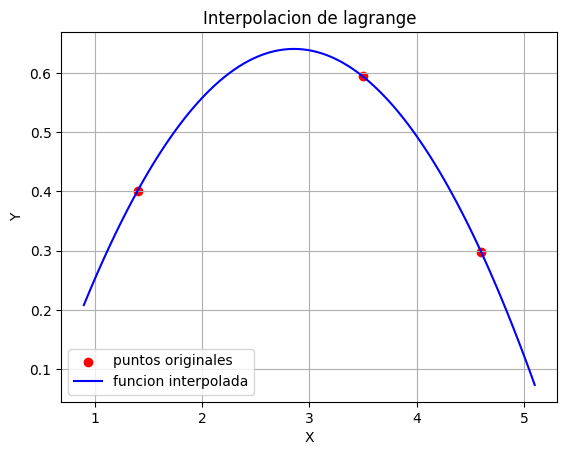

In [ ]:
plt.figure()
plt.scatter(X,Y, color = 'red', label = 'puntos originales')
plt.plot(x_new, y_interpolada, color = 'blue', label = 'funcion interpolada')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Interpolacion de lagrange')
plt.legend()


         2
-0.1129 x + 0.6452 x - 0.2812


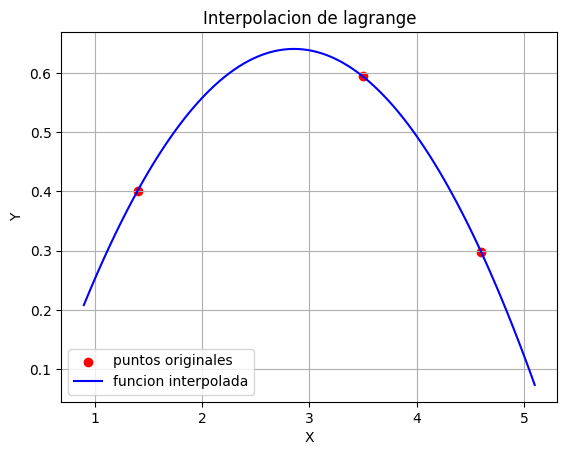

In [ ]:
#hice esto para comprobar la interpolacion de lagrange con el codigo hecho en clase con una libreria.
#aqui confirmo que el polinomio correspondiente si es igual al que bota la libreria.
polynuevo = lagrange(X,Y)
x_new1 = np.linspace(min(X)-0.5, max(X)+0.5, 100)
y_new1 = polynuevo(x_new1)

plt.figure()
plt.scatter(X,Y, color = 'red', label = 'puntos originales')
plt.plot(x_new1, y_new1, color = 'blue', label = 'funcion interpolada')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Interpolacion de lagrange')
plt.legend()

print (polynuevo)


In [ ]:
#calculo de la velocidad inicial y el angulo de salida mediante el polinomio de interpolacion de lagrange.
theta = np.arctan(0.645219705646515)
theta_grados = np.degrees(theta)
vo = np.sqrt((g)/(2*(0.112889093542262)*(math.cos(theta))*(math.cos(theta))))
print('El angulo de salida teniendo en cuenta el polinomio de interpolacion de lagrange es: ' + str(theta_grados))
print('La velocidad incial de la bala aproximandamente es: ' + str(vo))

El angulo de salida teniendo en cuenta el polinomio de interpolacion de lagrange es: 32.83090500582803
La velocidad incial de la bala aproximandamente es: 7.840630236949827
